<a href="https://colab.research.google.com/github/jdonohueDev/StudentOutcomePredictor/blob/main/StudentPerformancePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Engineering

In [18]:
import pandas as pd
import requests
import zipfile
import io
from scipy.io import arff
from sklearn.model_selection import train_test_split
import warnings
import os
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
import kagglehub
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [19]:
data = pd.read_csv(r'/content/StudentPerformanceFactors.csv')
df = pd.DataFrame(data)

In [20]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [21]:
#Getting number of rows and columns

df.shape

(6607, 20)

In [22]:
#View Columns

df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [23]:
#Descriptive statistics for non-ordinal features
#Note: We don't necessarily need to be converned with ordinal data right now
# as RFC will ignore non-numerical datapoints

print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [24]:
#Get the missing counts for each feature

missing_counts = df.isna().sum()
print(missing_counts)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [25]:
#Remove missing values

df = df.dropna()

In [26]:
#Missing counts after clearing N/A values

missing_counts = df.isna().sum()
print(missing_counts)

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [27]:
#Partitioning the data

X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

y = (y >= 70).astype(int)

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
#Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    )

In [29]:
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=500)

In [30]:
#Accuracy on training data
model.score(X_train, y_train)

0.992809839167455

In [31]:
xtest_arr = model.predict(X_test)

In [32]:
#Accuracy of Classification
accuracy_score(y_test, xtest_arr)

0.924357034795764

In [33]:
from operator import mod
#Hyper-parameter Tuning
from sklearn.model_selection import GridSearchCV

''' Hyper-Params for Random Forest Classifier
    n_estimators=500,
    criterion='gini',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
'''

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 5, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

model = grid_search.fit(X_train, y_train)


In [34]:
print(grid_search.best_params_)

{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [35]:
best_model = grid_search.best_estimator_

In [36]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=300)

In [37]:
best_model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [38]:
#Accuracy after tuning
accuracy_score(y_test, best_model.predict(X_test))

0.9220877458396369

In [39]:
#Feature Importance
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

Attendance                               0.320781
Hours_Studied                            0.207643
Previous_Scores                          0.090855
Tutoring_Sessions                        0.043111
Sleep_Hours                              0.038042
Physical_Activity                        0.033877
Access_to_Resources_Medium               0.017030
Access_to_Resources_Low                  0.016911
Parental_Involvement_Low                 0.015652
Peer_Influence_Positive                  0.014891
Family_Income_Low                        0.014759
Extracurricular_Activities_Yes           0.014388
Parental_Involvement_Medium              0.014387
Parental_Education_Level_High School     0.014224
Gender_Male                              0.013437
Teacher_Quality_Medium                   0.013367
Distance_from_Home_Near                  0.013013
Motivation_Level_Low                     0.012740
Motivation_Level_Medium                  0.012245
School_Type_Public                       0.011919


In [40]:
'''
Important features for intervention
Attendance                               0.326359
Hours_Studied                            0.203341
Previous_Scores                          0.088780
Tutoring_Sessions                        0.042805
Sleep_Hours                              0.036601
Physical_Activity                        0.033256

Categorize important values and create a function for
intervention concern levels, values confirmed by Domain Expert.

Minimum viable scores until intervention is necessary:
Attendance                            <= 80:    Intervention
Hours_Studied                         <= 20:    Intervention
Previous_Scores                       <= 65:    Intervention
Sleep_Hours                           <= 5:     Intervention
Tutoring_Sessions                        #:     No intervention, this score is not necessary for intervention but is indicative of impact.
Physical_Activity                        #:     No intervention, this score is not necessary for intervention, but is indicative of impact.

'''

'\nImportant features for intervention\nAttendance                               0.326359\nHours_Studied                            0.203341\nPrevious_Scores                          0.088780\nTutoring_Sessions                        0.042805\nSleep_Hours                              0.036601\nPhysical_Activity                        0.033256\n\nCategorize important values and create a function for\nintervention concern levels, values confirmed by Domain Expert.\n\nMinimum viable scores until intervention is necessary:\nAttendance                            <= 80:    Intervention\nHours_Studied                         <= 20:    Intervention\nPrevious_Scores                       <= 65:    Intervention\nSleep_Hours                           <= 5:     Intervention\nTutoring_Sessions                        #:     No intervention, this score is not necessary for intervention but is indicative of impact.\nPhysical_Activity                        #:     No intervention, this score is not nec

In [41]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Visualization

In [42]:
#Create a new dataframe without dummies for visualization
dfvis = df.copy()

#Categorical to numerical mapping
dfvis['Gender'] = dfvis['Gender'].map({'Female': 0, 'Male': 1})
dfvis['Parental_Involvement'] = dfvis['Parental_Involvement'].map({'Low': 0, 'Medium': 1, 'High': 3})
dfvis['Extracurricular_Activities'] = dfvis['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})
dfvis['Access_to_Resources'] = dfvis['Access_to_Resources'].map({'Low': 0, 'Medium': 1, 'High': 2})
dfvis['Motivation_Level'] = dfvis['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
dfvis['Internet_Access'] = dfvis['Internet_Access'].map({'No': 0, 'Yes': 1})
dfvis['Family_Income'] = dfvis['Family_Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
dfvis['Teacher_Quality'] = dfvis['Teacher_Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})
dfvis['School_Type'] = dfvis['School_Type'].map({'Public': 0, 'Private': 1})
dfvis['Peer_Influence'] = dfvis['Peer_Influence'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
dfvis['Learning_Disabilities'] = dfvis['Learning_Disabilities'].map({'No': 0, 'Yes': 1})
dfvis['Parental_Education_Level'] = dfvis['Parental_Education_Level'].map({'High School': 0, 'College': 1, 'Postgraduate': 2})
dfvis['Distance_from_Home'] = dfvis['Distance_from_Home'].map({'Near': 0, 'Moderate': 1, 'Far': 2})

In [43]:
#Checking if values have been properly mapped
dfvis

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,1,4,0,2,0,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,0,4,0,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,1,4,0,1,0,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,1,0,7,76,1,1,1,2,1,0,2,2,0,0,0,0,68
6603,23,76,3,1,0,8,81,1,1,3,0,2,0,2,2,0,0,0,0,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,0,0,2,0,2,0,0,68
6605,10,86,3,2,1,6,91,2,1,2,0,1,1,2,3,0,0,2,0,68


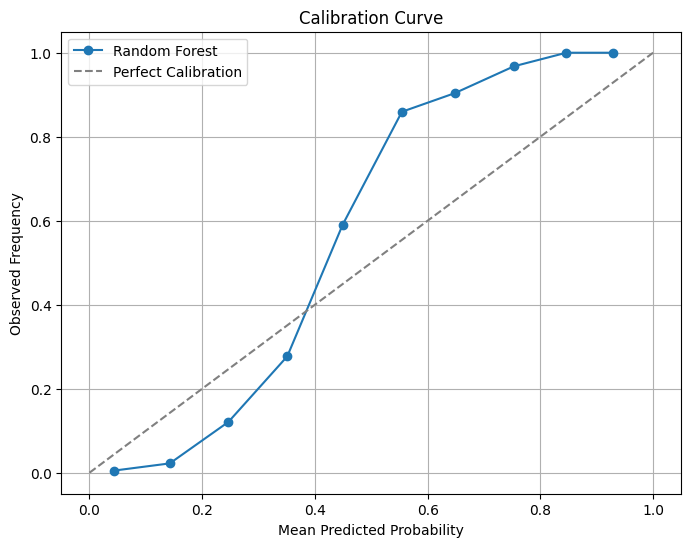

In [44]:
#Plot Comparison of Calibration of Classifiers

import matplotlib.pyplot as plt
import numpy as np

#Predict probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

#Create bins for calibration plot
bins = np.linspace(0, 1, 11)

#Calculate mean predicted probability and observed frequency in each bin
bin_means = []
bin_freqs = []

for i in range(len(bins) - 1):
  bin_indices = np.where((y_prob >= bins[i]) & (y_prob < bins[i + 1]))[0]
  if len(bin_indices) > 0:
    bin_means.append(np.mean(y_prob[bin_indices]))
    bin_freqs.append(np.mean(y_test.iloc[bin_indices]))

#Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(bin_means, bin_freqs, marker='o', linestyle='-', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Observed Frequency')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

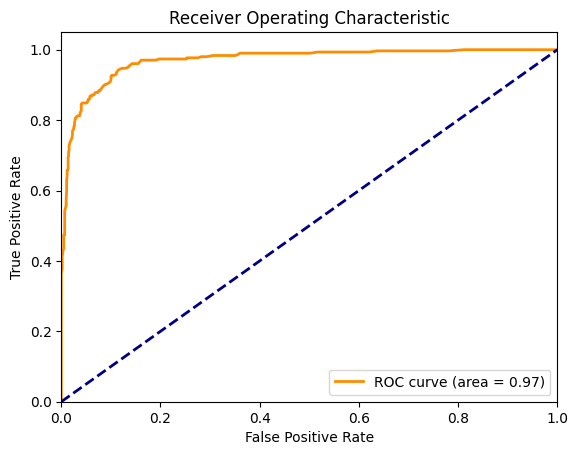

In [45]:
#Plot the ROC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Predict probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

#Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

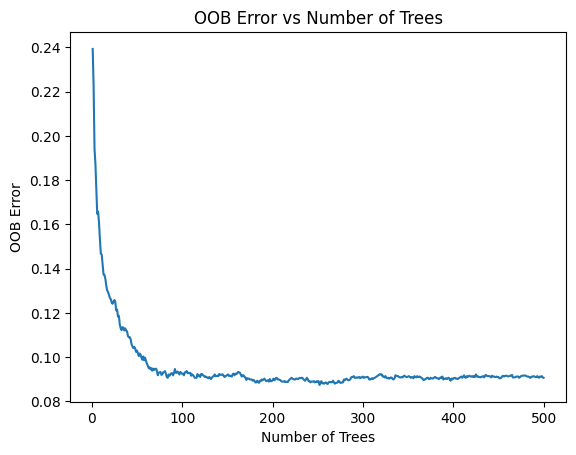

In [46]:
#Plot OOB Errors for Random Forests

import matplotlib.pyplot as plt

oob_errors = []
n_estimators_range = range(1, 501)
for n_estimators in n_estimators_range:
  rf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42,n_jobs=-1) #n_jobs=-1 for parallelization
  rf.fit(X_train, y_train)
  oob_errors.append(1 - rf.oob_score_)

#Plot OOB errors
plt.plot(n_estimators_range, oob_errors)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.title("OOB Error vs Number of Trees")
plt.show()

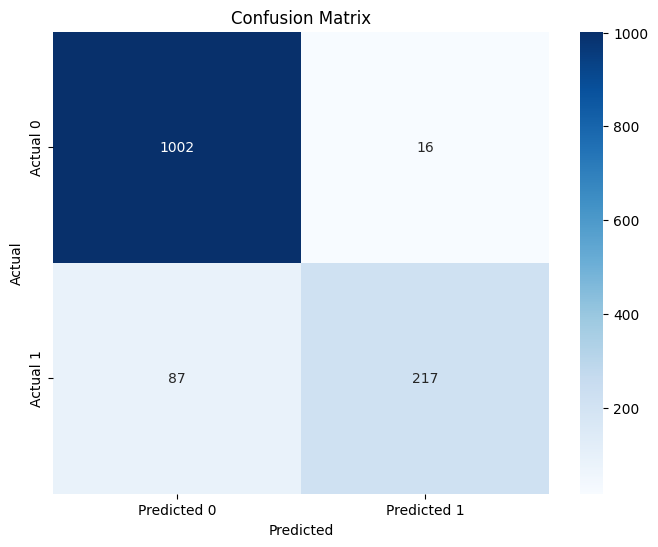

In [47]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

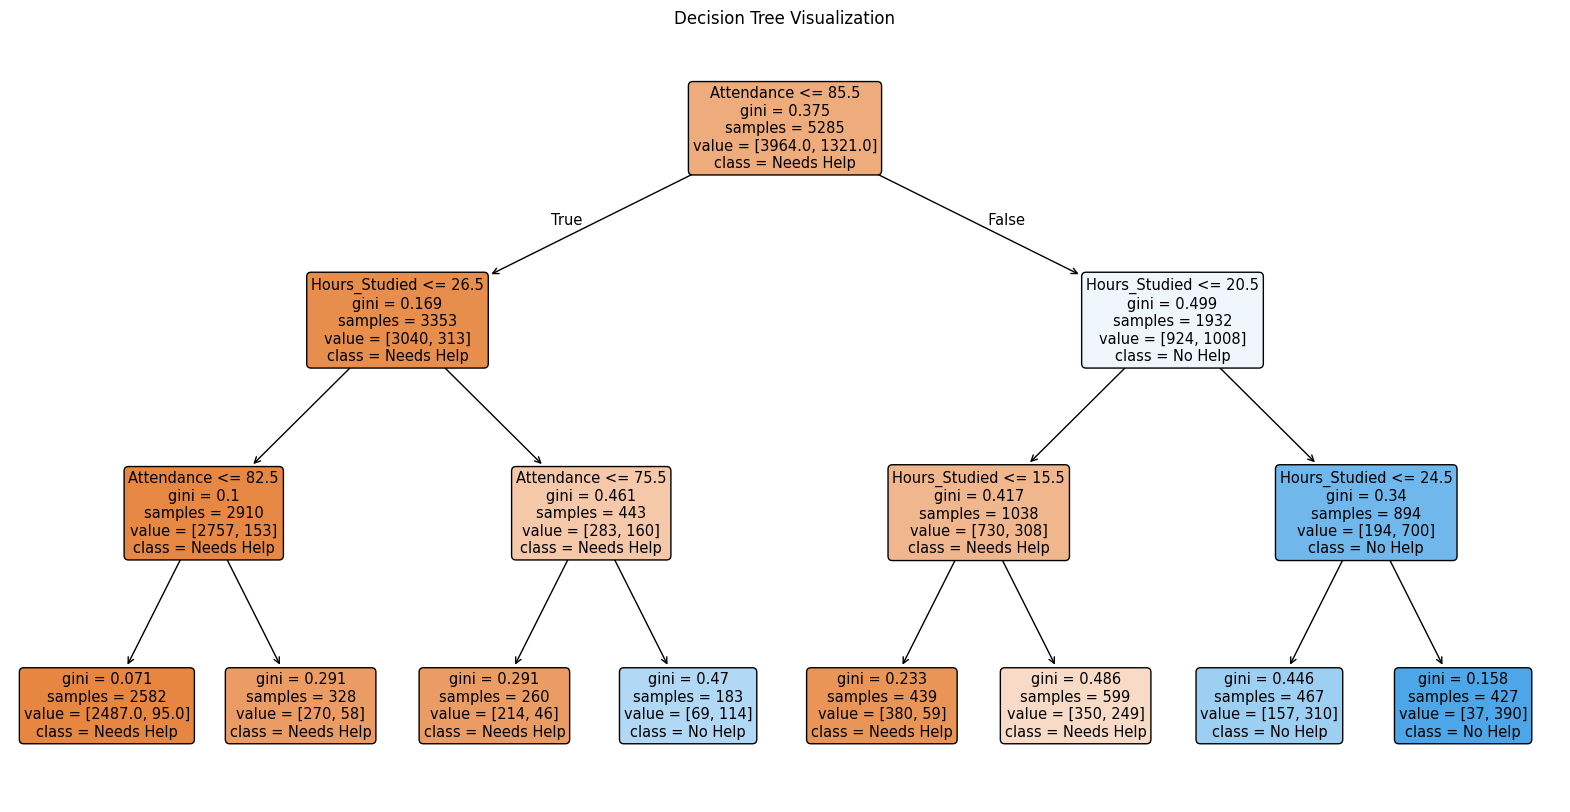

In [48]:
#Generate Example Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dt_model = DecisionTreeClassifier(max_depth=3)

dt_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Needs Help", "No Help"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Example Analysis

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
def predict_intervention(student_data, feature_names, classification_model, regression_model):
    """
    Predicts if a student needs help and highlights intervention features with details.

    Parameters:
    - student_data (dict): A dictionary containing the student's data.
    - feature_names (list): List of feature names expected by the models.
    - classification_model (sklearn model): A trained classification model (e.g., RandomForestClassifier).
    - regression_model (sklearn model): A trained regression model (e.g., RandomForestRegressor).

    Returns:
    - classification_prediction (int): 1 if the student does not need help, 0 if intervention is needed.
    - regression_prediction (float): Predicted grade for the student.
    - interventions (list): A list of features requiring intervention with reasons.
    """

    student_df = pd.DataFrame([student_data])
    student_df = pd.get_dummies(student_df)
    student_df = student_df.reindex(columns=feature_names, fill_value=0)

    classification_prediction = classification_model.predict(student_df)[0]
    regression_prediction = regression_model.predict(student_df)[0]

    interventions = []
    if student_df['Attendance'][0] <= 80:
        interventions.append(f"Attendance: {student_df['Attendance'][0]} (<= 80)")
    if student_df['Hours_Studied'][0] <= 20:
        interventions.append(f"Hours Studied: {student_df['Hours_Studied'][0]} (<= 20)")
    if student_df['Previous_Scores'][0] <= 65:
        interventions.append(f"Previous Scores: {student_df['Previous_Scores'][0]} (<= 65)")
    if student_df['Sleep_Hours'][0] <= 5:
        interventions.append(f"Sleep Hours: {student_df['Sleep_Hours'][0]} (<= 5)")

    if interventions:
        print("Intervention Needed For:")
        for detail in interventions:
            print(f"- {detail}")
    else:
        print("No specific intervention features flagged.")

    return classification_prediction, regression_prediction, interventions

In [92]:
#Calculate MAE
y_pred = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 1.3084717868338562


In [93]:
#Edit input for student classification and regression
example_student = {
    'Attendance': 75,
    'Hours_Studied': 15,
    'Previous_Scores': 80,
    'Sleep_Hours': 4,
}

classification_prediction, regression_prediction, interventions = predict_intervention(
    example_student,
    X.columns.tolist(),
    model,
    rf_regressor
)

print("\nPrediction:", "No Help Needed" if classification_prediction == 1 else "Help Needed")
print(f"Predicted Grade: {regression_prediction:.2f}")

Intervention Needed For:
- Attendance: 75 (<= 80)
- Hours Studied: 15 (<= 20)
- Sleep Hours: 4 (<= 5)

Prediction: Help Needed
Predicted Grade: 65.22
